In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv("pima_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 70% training and 30% test

In [28]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

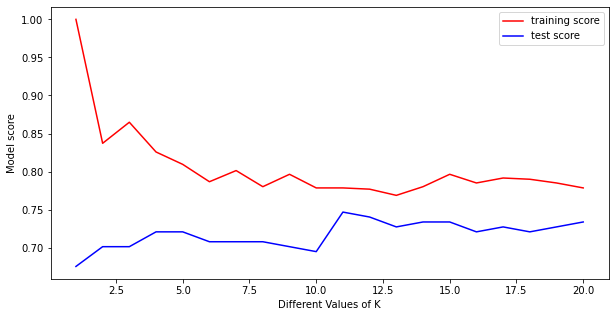

In [29]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend()
plt.show()

In [31]:
model = KNeighborsClassifier(n_neighbors = 11)

#Fit the model
model.fit(X_train,y_train)

#get the score
model.score(X_test,y_test)

0.7467532467532467

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification

In [39]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=53)

### What is bias?
In the simplest terms, Bias is the difference between the Predicted Value and the Expected Value. To explain further, the model makes certain assumptions when it trains on the data provided. When it is introduced to the testing/validation data, these assumptions may not always be correct.

In [49]:
model_bias = LogisticRegression()
model_bias.fit(X,y)

LogisticRegression()

In [50]:
x11, x22 = np.meshgrid(
    np.linspace(X.T[0].min(), X.T[0].max(),1000),
    np.linspace(X.T[1].min(), X.T[1].max(),1000))

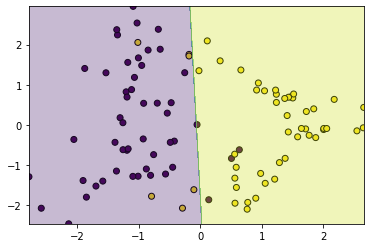

In [51]:
plt.scatter(X.T[0], X.T[1], c=y, edgecolors= "black" )
plt.contourf(x11,x22,
             model_bias.predict(
                 np.array(
                     [x11.ravel(),x22.ravel()]).T).reshape(x11.shape), alpha= 0.3)
#this model is underfitting. high bias causes underfitting

### What is variance?
Contrary to bias, the Variance is when the model takes into account the fluctuations in the data, the noise as well. That is, the model learns too much from the training data that when confronted with new (testing) data, it is unable to predict accurately based on it. 

In [52]:
model_variance = LogisticRegression(solver = "liblinear")
poly = PolynomialFeatures(11)
poly.fit(X)

PolynomialFeatures(degree=11)

In [53]:
model_variance.fit(poly.transform(X),y)

LogisticRegression(solver='liblinear')

In [46]:
x11, x22 = np.meshgrid(
    np.linspace(X.T[0].min(), X.T[0].max(),1000),
    np.linspace(X.T[1].min(), X.T[1].max(),1000))

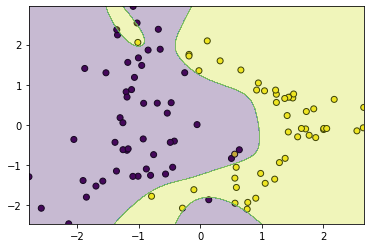

In [54]:
plt.scatter(X.T[0], X.T[1], c=y, edgecolors= "black" )
plt.contourf(x11,x22,
             model_variance.predict(poly.transform(
                 np.array(
                     [x11.ravel(),x22.ravel()]).T)).reshape(x11.shape), alpha= 0.3)
#this model is overfitting. high variance causes overfitting

### Bias-Variance Tradeoff
To achieve a balance between the Bias error and the Variance error, we need a value of degree such that the model neither learns from the noise (overfit on data) nor makes sweeping assumptions on the data (underfit on data).

In [58]:
model_balanced = LogisticRegression(solver = "liblinear")
poly = PolynomialFeatures(5)
poly.fit(X)

PolynomialFeatures(degree=5)

In [59]:
model_balanced.fit(poly.transform(X),y)

LogisticRegression(solver='liblinear')

In [60]:
x11, x22 = np.meshgrid(
    np.linspace(X.T[0].min(), X.T[0].max(),1000),
    np.linspace(X.T[1].min(), X.T[1].max(),1000))

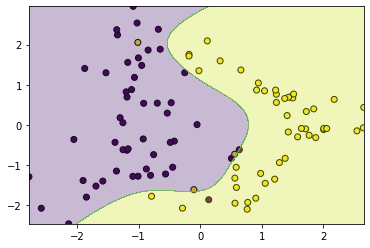

In [61]:
plt.scatter(X.T[0], X.T[1], c=y, edgecolors= "black" )
plt.contourf(x11,x22,
             model_balanced.predict(poly.transform(
                 np.array(
                     [x11.ravel(),x22.ravel()]).T)).reshape(x11.shape), alpha= 0.3)